In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [2]:
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
cols = ['Undergrad','Marital.Status','Urban']
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


<AxesSubplot:>

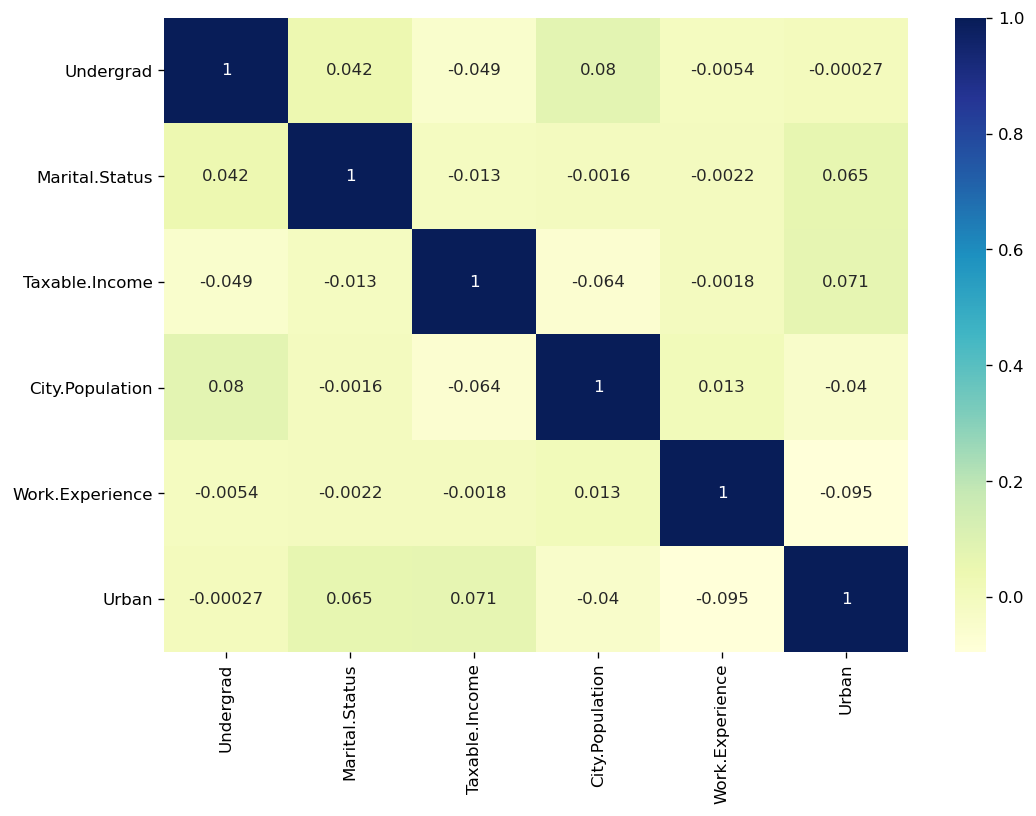

In [7]:
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams["figure.dpi"] = 120
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [8]:
def target(num):
    if num <=30000:
        return 'Risky'
    else:
        return 'Good'

In [9]:
df['Taxable.Income'] = df['Taxable.Income'].apply(target)

In [10]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

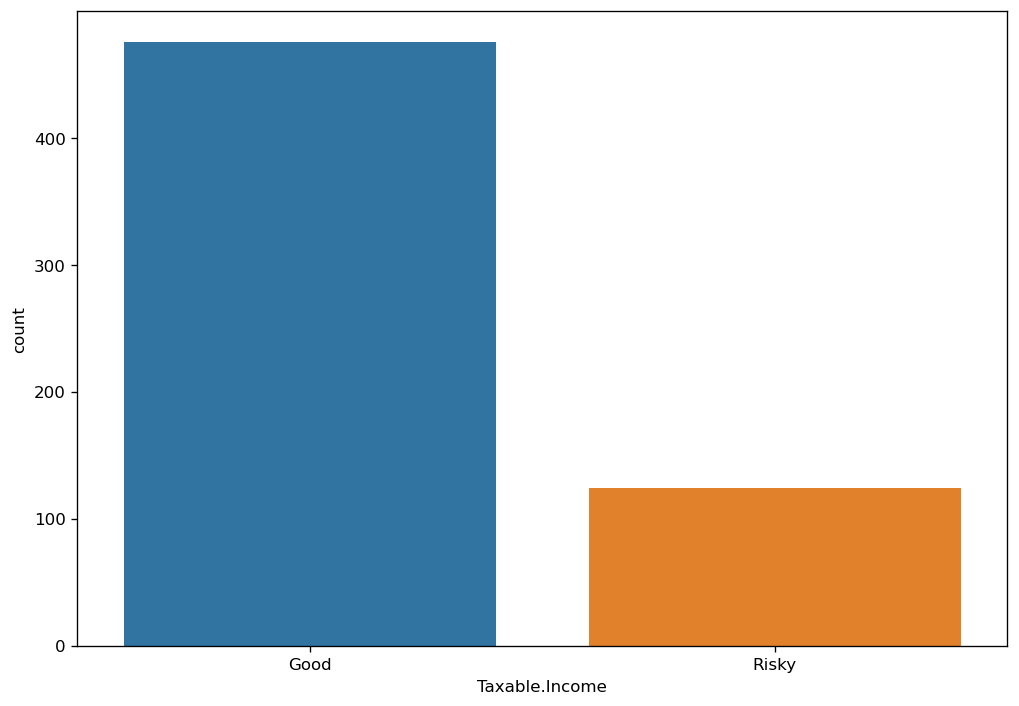

In [11]:
sns.countplot(df['Taxable.Income'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

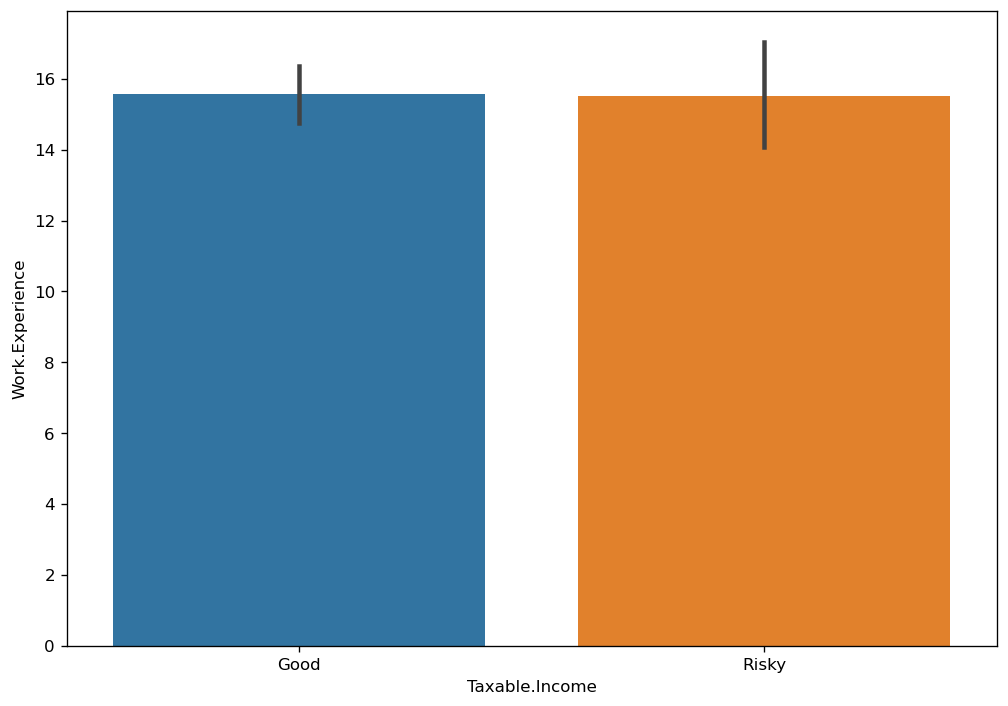

In [12]:
sns.barplot('Taxable.Income','Work.Experience', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


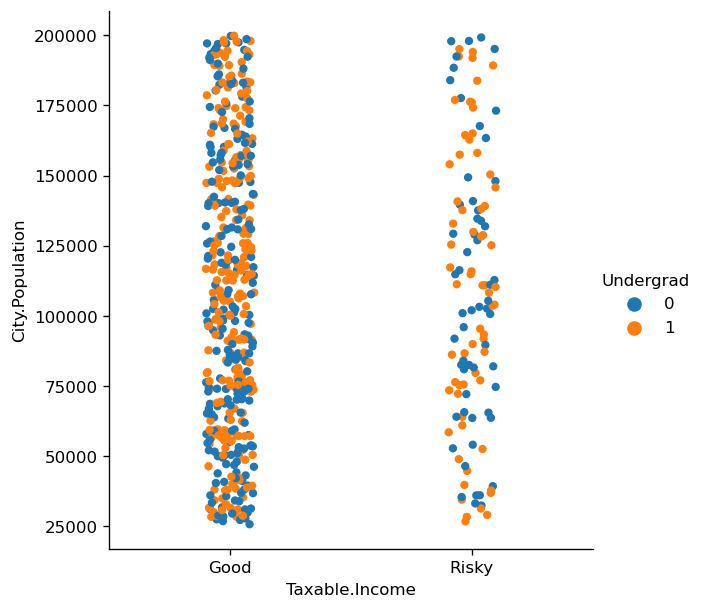

In [14]:
sns.catplot('Taxable.Income','City.Population', hue='Undergrad', data=df)

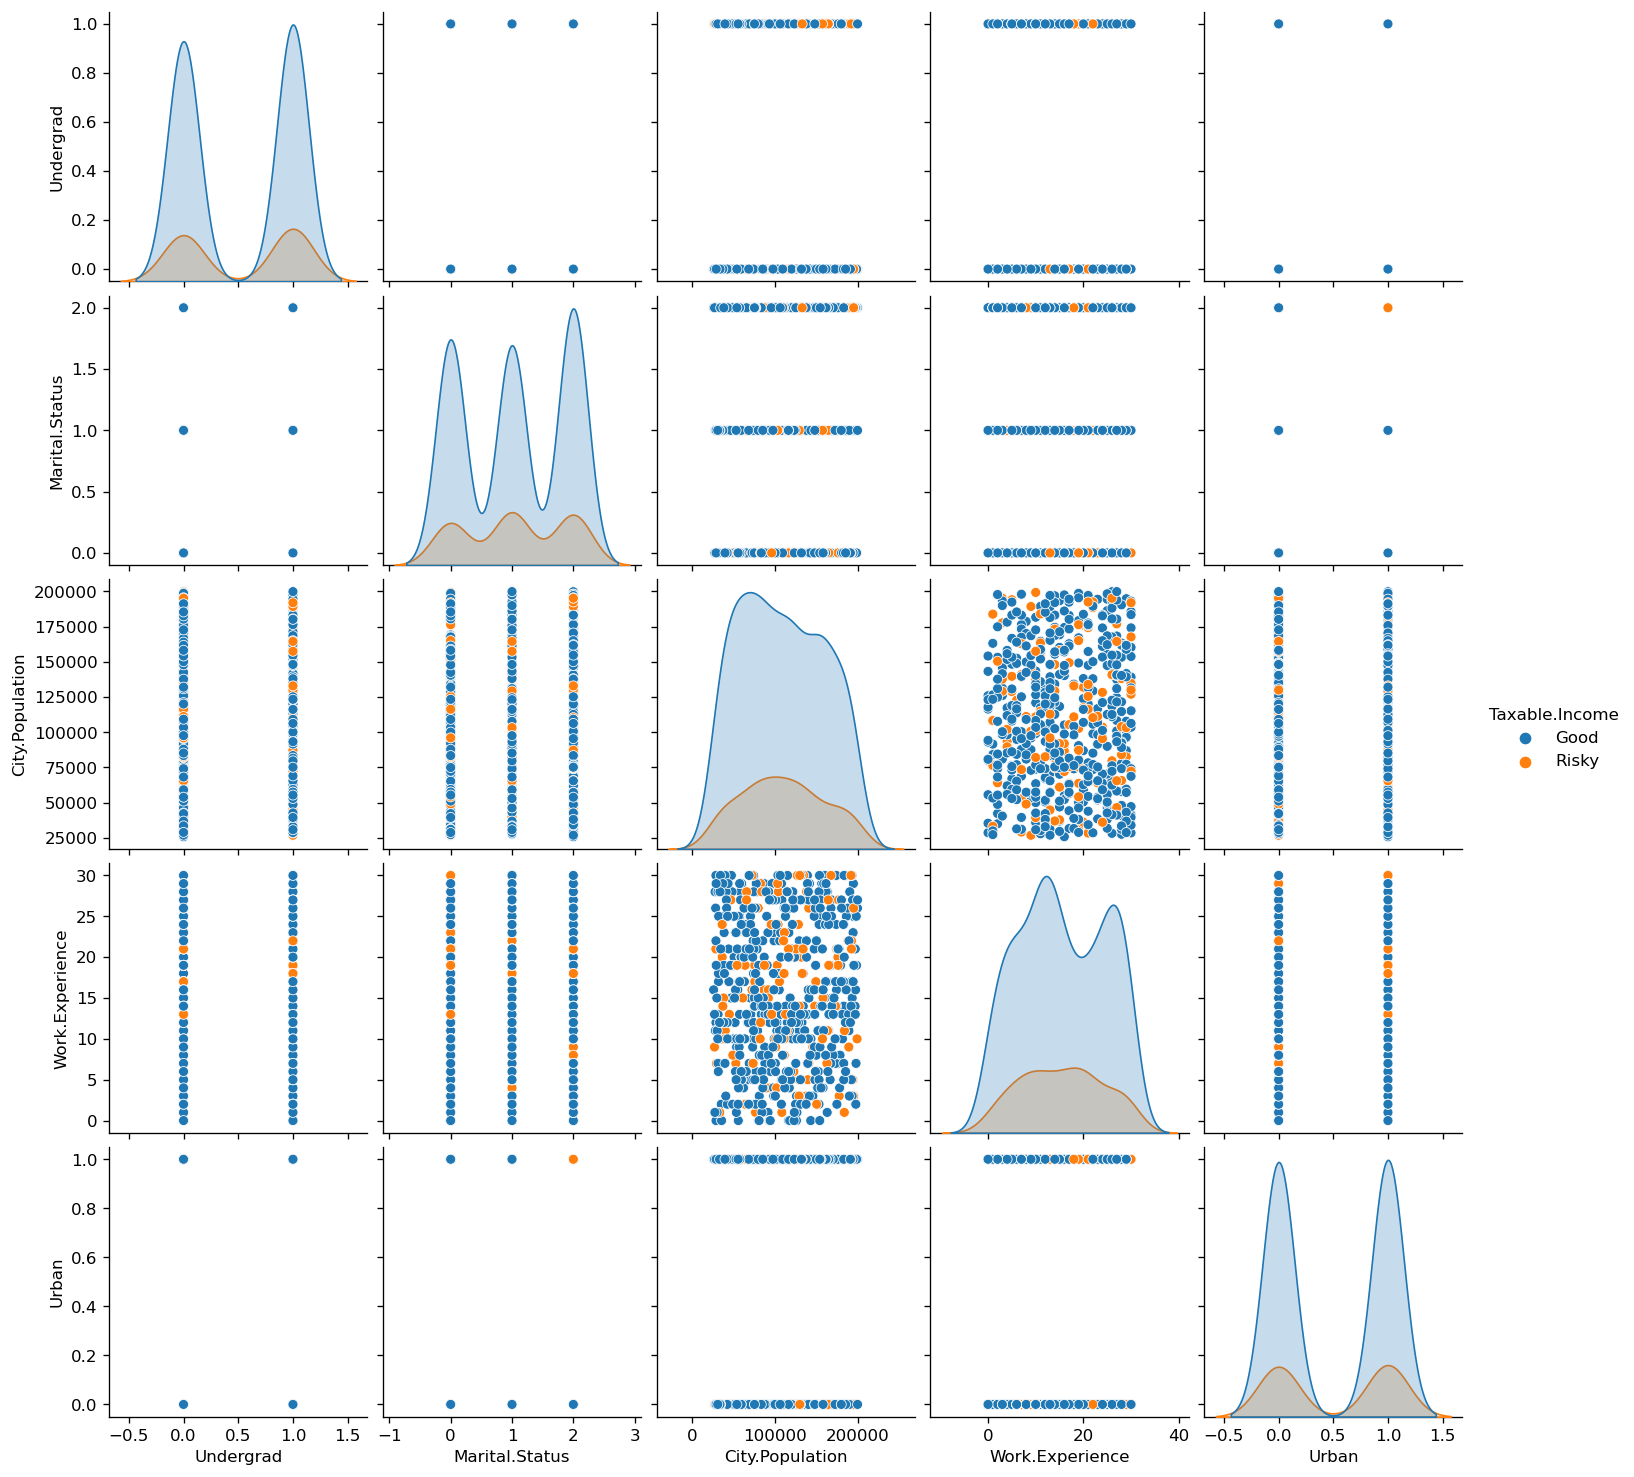

In [15]:
sns.pairplot(df, hue='Taxable.Income')

## MODEL BUILDING

In [16]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [17]:
x = df[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y = df['Taxable.Income']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 10)

In [20]:
model = RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [21]:
y_pred = model.predict(x_test)

In [22]:
print('The accuracy score is: ', accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion matrix is: ', confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')
print('Classification report is: ', classification_report(y_test,y_pred))

The accuracy score is:  0.7
--------------------------------------------------------
Confusion matrix is:  [[124  14]
 [ 40   2]]
--------------------------------------------------------
Classification report is:                precision    recall  f1-score   support

        Good       0.76      0.90      0.82       138
       Risky       0.12      0.05      0.07        42

    accuracy                           0.70       180
   macro avg       0.44      0.47      0.45       180
weighted avg       0.61      0.70      0.65       180



**HYPERPARAMETER TUNING WITH RANDOMIZED CV**

In [23]:
params = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [int(x) for x in np.linspace(10, 1000,10)],
               'min_samples_split': [2,5,10,14,18],
               'min_samples_leaf': [1,2,4,6,8],
              'criterion':['entropy','gini']
}

In [25]:
rf_model = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=params,cv=10,n_iter=100)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14, 18],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [26]:
random_search.best_estimator_

RandomForestClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=5, n_estimators=1200)

In [27]:
rf_model = RandomForestClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=5, n_estimators=1200)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=1000, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=5, n_estimators=1200)

In [28]:
rf_pred = rf_model.predict(x_test)

In [29]:
print('The accuracy score is: ', accuracy_score(y_test,rf_pred))
print('--------------------------------------------------------')
print('Confusion matrix is: ', confusion_matrix(y_test,rf_pred))
print('--------------------------------------------------------')
print('Classification report is: ', classification_report(y_test,rf_pred))

The accuracy score is:  0.7666666666666667
--------------------------------------------------------
Confusion matrix is:  [[138   0]
 [ 42   0]]
--------------------------------------------------------
Classification report is:                precision    recall  f1-score   support

        Good       0.77      1.00      0.87       138
       Risky       0.00      0.00      0.00        42

    accuracy                           0.77       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.59      0.77      0.67       180



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
rf_model.feature_importances_

array([0.04872397, 0.08397798, 0.46029377, 0.35434028, 0.052664  ])

In [31]:
feature_imp = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': rf_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_imp

,feature,importance
2,City.Population,0.460294
3,Work.Experience,0.354340
1,Marital.Status,0.083978
4,Urban,0.052664
0,Undergrad,0.048724


**CONCLUSION**
- City population is the most important feature in the dataset.